# STRESS SCENARIOS

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
root = os.environ['HOME']+"/private/pca-yield-curve-analytics/"
sys.path.append(root)

from src.utils import calc_rmse, std_scale_pandas, adf_test, rainbow

### Eigen Scores
***

In [10]:
eig_scores_up = pd.read_csv("../assets/stress/eig_scores/up.csv", index_col="DATE", parse_dates=["DATE"])
eig_scores_down = pd.read_csv("../assets/stress/eig_scores/down.csv", index_col="DATE", parse_dates=["DATE"])

NameError: name 'components' is not defined

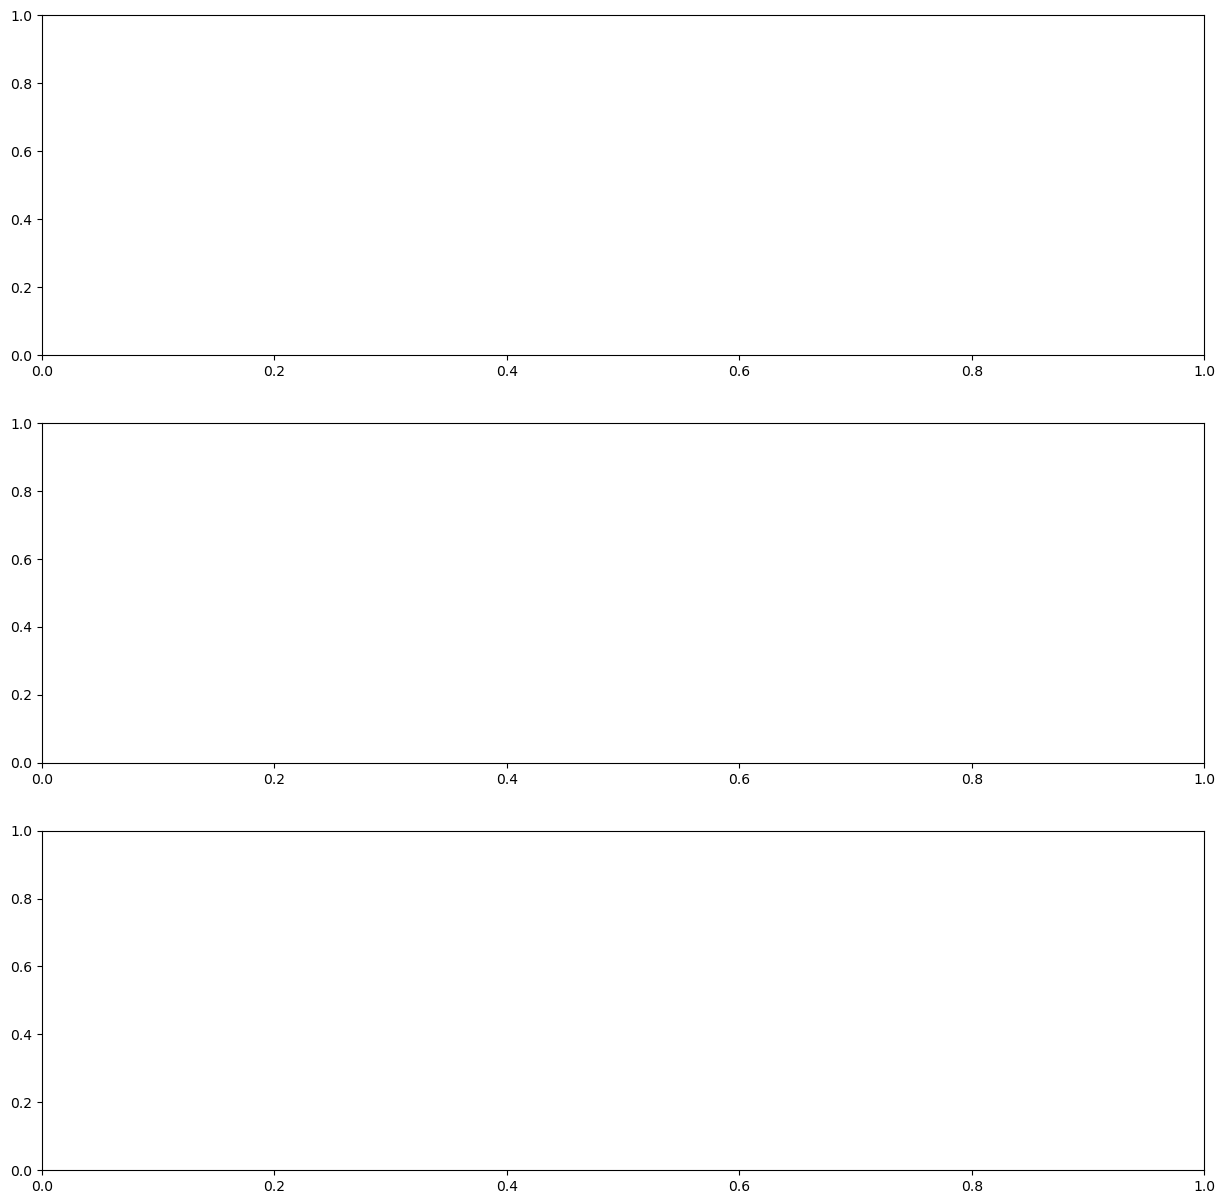

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
color = rainbow(["actual", "up", "down"])

for i,j in enumerate(components):
    ax[i].plot(eig_scores[j], c="turquoise", label="actual", lw=1.5)
    ax[i].fill_between(
        x=eig_scores_down.index, 
        y1=eig_scores_down[j], 
        y2=eig_scores_up[j],
        alpha=0.2,
        color="turquoise"
    )

    ax[i].set_title (f'Stress Scenario - {j}')
    ax[i].set_ylabel ("Eigen Score")
    
plt.subplots_adjust(hspace=0.25)
plt.show()

### Rates
***

In [ ]:
stress_up_dic   = {i: pd.read_csv("../assets/stress/rates/"+i+"_up.csv", index_col="DATE") for i in components}
stress_down_dic = {i: pd.read_csv("../assets/stress/rates/"+i+"_down.csv", index_col="DATE") for i in components}

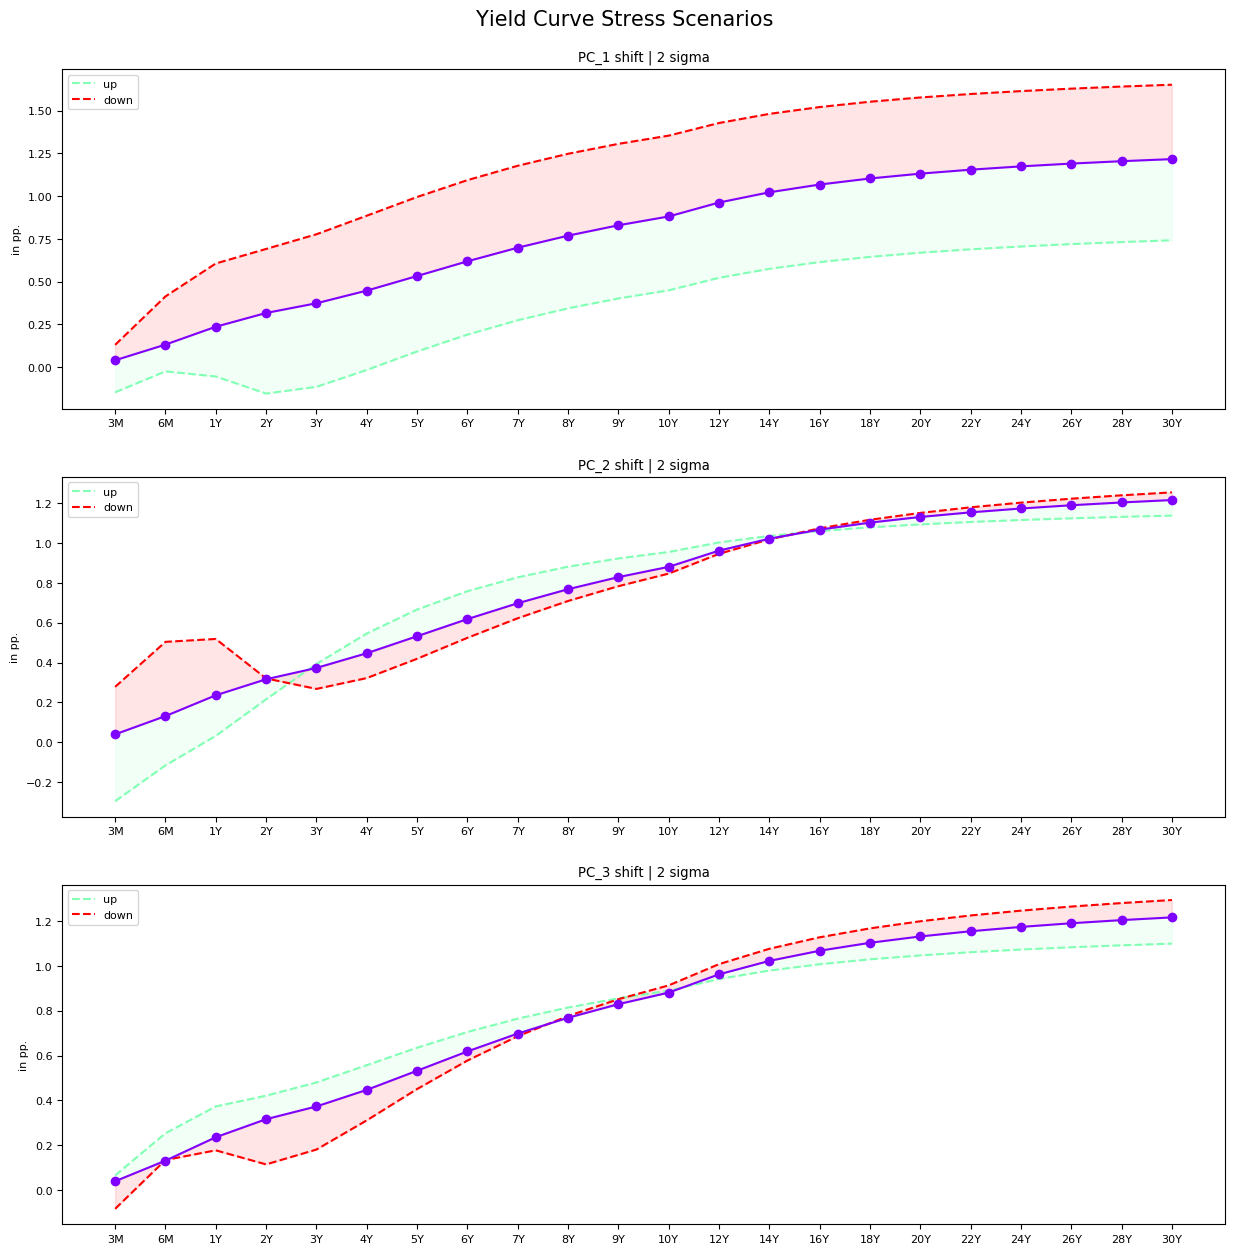

In [ ]:
fig, ax = plt.subplots(nrows=pca.k, ncols=1, figsize = (pca.k*5,15))
fig.suptitle("Yield Curve Stress Scenarios", fontsize=15, y=0.92)
color = rainbow(["actual","up","down"])

idx = 20

for i,j in enumerate (components):
    up   = stress_up_dic[j].iloc[-idx]
    down = stress_down_dic[j].iloc[-idx]
    act  = df_train.iloc[-idx]
    
    ax[i].plot(up, label="up", c=color["up"], ls="--")
    ax[i].plot(down, label="down", c=color["down"], ls="--")
    ax[i].plot(act, c=color["actual"], marker="o")
    
    ax[i].fill_between(maturities_all, up, act, color = color["up"], alpha = 0.1)
    ax[i].fill_between(maturities_all, down, act, color = color["down"], alpha = 0.1)
    
    ax[i].set_ylabel("in pp.")
    ax[i].set_title("{} shift | {} sigma".format(j, 2))
    ax[i].legend()

plt.show()